# Hipótesis del ausente
Hay una manera de sopesar un posible fraude electoral en las elecciones del 2021 para la segunda vuelta presidencial: comparar el porcentaje del electorado que posiblemente no fue a votar con el número de ausentes. Este porcentaje es calculado por grupos etarios (3 para ser específico: los votantes de edades menores a 18 años, los votantes que tienen edades entre 18 y 65 años y los que votantes de edades mayores a 65 años, esto se detallará más adelante). <br>
Como nos encontrabamos en medio de una pandemia y las consecuencias aún eran altas para grupos de alto riesgo (personas de edades superiores a los 65 años), la presencia de mas ausencias de voto debería ser probablemente más alta en donde el porcentaje de ancianos es mayor. Esto, dicho formalmente, puede ser resumiendo en una regresión simple: <br>
\begin{equation}
a = a_{o} + \beta_{1}electores^{edades>65} + u  
;\end{equation}
donde $a_{o}$ sería la ausencia inercial esperada, es decir, la ausencia media que se percibe cada año en promedio; $ electores^{edades>65} $ es el porcentaje de votantes habilitados en la parroquia de más de 65 años;
$ \beta_{1} $ es el coeficiente de multiplicación para $ electores^{edades>65} $, medido en puntos porcentuales (pp); y $ u $ es el error. <>
$\beta_{1}$ debería ser positivo necesariamente para expresar esta relación y significativo.
Esto es lo que pretendemos verificar y probar a continuación.

# Ajuste de base electoral

Para obtener una muestra de datos que sea consistente y evite el sesgo vamos a hacer unos ajustes antes.

In [1]:
# Cargamos las librerías

import pandas as pd
import numpy as np
import pyreadstat as pyd

In [2]:
# Cargamos los datos

df2_elec2021, meta = pyd.read_sav('Data/Elecciones_General_2021/segunda_vuelta.zsav', apply_value_formats=True)

**Nota**: No se leen los datos con pandas porque pyreadstat permite leer codificaciones de la base.

In [3]:
# Primero debemos transformar los códigos a enteros, para que no se cofiquen como caractér con puntos
 
df2_elec2021 = df2_elec2021.astype({'DIGNIDAD_NOMBRE': str,
                                  'PROVINCIA_CODIGO': int,
                                  'PROVINCIA_NOMBRE': str,
                                  'CIRCUNSCRIPCION_CODIGO': int,
                                  'CIRCUNSCRIPCION_NOMBRE': str,
                                  'CANTON_CODIGO': int,
                                  'CANTON_NOMBRE': str, 
                                  'PARROQUIA_CODIGO': int,
                                  'PARROQUIA_NOMBRE': str,
                                  'JUNTA_SEXO': str,
                                  'CANDIDATO_CODIGO_RESULTADOS': int, 
                                  'OP_CODIGO': int, 
                                  'SUFRAGANTES': float, 
                                  'BLANCOS': float,
                                  'NULOS': float, 
                                  'VOTOS': float})


In [4]:
df2_elec2021 = df2_elec2021.astype({'PROVINCIA_CODIGO': str,
                                  'CIRCUNSCRIPCION_CODIGO': str,
                                  'CANTON_CODIGO': str,
                                  'PARROQUIA_CODIGO': str,
                                  'CANDIDATO_CODIGO_RESULTADOS': str})

In [5]:
# Mostramos los datos ordenaods por el código de parroquia

df2_elec2021.sort_values(by=['PARROQUIA_CODIGO'])

# OP_CODIGO es el código de la organización política, ya que no hay una descripción en los metadatos. 

,DIGNIDAD_NOMBRE,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CIRCUNSCRIPCION_CODIGO,CIRCUNSCRIPCION_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,JUNTA_SEXO,OP_CODIGO,CANDIDATO_CODIGO_RESULTADOS,SUFRAGANTES,BLANCOS,NULOS,VOTOS
2913,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,M,1030,10001030,5726.0,120.0,574.0,3710.0
2912,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,M,1021,10001021,5726.0,120.0,574.0,1322.0
2911,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,F,1030,10001030,5361.0,106.0,720.0,3194.0
2910,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,F,1021,10001021,5361.0,106.0,720.0,1341.0
2115,PRESIDENTA/E Y VICEPRESIDENTA/E,10,IMBABURA,0,-,30,IBARRA,100,AMBUQUI/CHOTA,F,1030,10001030,2215.0,77.0,381.0,1225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,PRESIDENTA/E Y VICEPRESIDENTA/E,5,COTOPAXI,0,-,115,SAQUISILI,990,COCHAPAMBA,F,1021,10001021,1457.0,17.0,575.0,723.0
2493,PRESIDENTA/E Y VICEPRESIDENTA/E,11,LOJA,0,-,310,PALTAS,995,CASANGA,M,1030,10001030,386.0,6.0,49.0,180.0
2492,PRESIDENTA/E Y VICEPRESIDENTA/E,11,LOJA,0,-,310,PALTAS,995,CASANGA,M,1021,10001021,386.0,6.0,49.0,151.0
2490,PRESIDENTA/E Y VICEPRESIDENTA/E,11,LOJA,0,-,310,PALTAS,995,CASANGA,F,1021,10001021,381.0,3.0,65.0,132.0


En primera instancia, vamos a estudiar el voto por organización política porque esto es útil para los resultados de las seccionales. Así que creemos una serie de ajustes para que sea posible estudiar lo deseado. 

In [6]:
# Nos contextualizamos obteniendo las codificaciones para las organizaciones políticas.

candidatos = pd.read_spss('Data/Elecciones_General_2021/candidatos.sav', convert_categoricals=True)
candidatos= candidatos[candidatos['DIGNIDAD_NOMBRE'] == 'PRESIDENTA/E Y VICEPRESIDENTA/E']
candidatos = candidatos[['CANDIDATO_CODIGO', 'CANDIDATO_NOMBRE']]
candidatos['CANDIDATO_CODIGO'] = candidatos['CANDIDATO_CODIGO'].astype(int).astype(str) 
candidatos

,CANDIDATO_CODIGO,CANDIDATO_NOMBRE
122,184,PEÑA PACHECO XIMENA DEL ROCIO
159,232,FREILE VALLEJO PEDRO JOSE
213,363,HERVAS MORA MARCELO XAVIER
259,461,ALMEIDA ESPINOZA CARLOS GERSON ALTEMAR
401,703,CELI SANTOS GUILLERMO ALEJANDRO
636,1117,LARREA CABRERA WILSON GUSTAVO
1022,1719,GUTIERREZ BORBUA LUCIO EDWIN
1102,1854,CARRASCO CARPIO PAUL ERNESTO
1335,2286,ANDRADE SALVADOR GIOVANNY MARCELO
1533,2619,PEREZ GUARTAMBEL YAKU SACHA


Ahora vamos a crear una nueva columna con una nueva clasificación útil de candidatos que usaremos para el análisis exploratorio luego. Esta consiste de 5 opciones: LASSO, ARAUZ, YAKU, HERVAS u OTRO CANDIDATO. 

In [7]:
candidatos['Alternativa_candidato'] = candidatos['CANDIDATO_NOMBRE'].apply(lambda celda: 'OTRO CANDIDATO' if celda not in ['ARAUZ GALARZA ANDRES DAVID', 'PEREZ GUARTAMBEL YAKU SACHA', 'LASSO MENDOZA GUILLERMO ALBERTO SANTIAGO', 'HERVAS MORA MARCELO XAVIER'] else celda)
candidatos

,CANDIDATO_CODIGO,CANDIDATO_NOMBRE,Alternativa_candidato
122,184,PEÑA PACHECO XIMENA DEL ROCIO,OTRO CANDIDATO
159,232,FREILE VALLEJO PEDRO JOSE,OTRO CANDIDATO
213,363,HERVAS MORA MARCELO XAVIER,HERVAS MORA MARCELO XAVIER
259,461,ALMEIDA ESPINOZA CARLOS GERSON ALTEMAR,OTRO CANDIDATO
401,703,CELI SANTOS GUILLERMO ALEJANDRO,OTRO CANDIDATO
636,1117,LARREA CABRERA WILSON GUSTAVO,OTRO CANDIDATO
1022,1719,GUTIERREZ BORBUA LUCIO EDWIN,OTRO CANDIDATO
1102,1854,CARRASCO CARPIO PAUL ERNESTO,OTRO CANDIDATO
1335,2286,ANDRADE SALVADOR GIOVANNY MARCELO,OTRO CANDIDATO
1533,2619,PEREZ GUARTAMBEL YAKU SACHA,PEREZ GUARTAMBEL YAKU SACHA


Notemos que hay el mismo número de juntas por sexo en cada parroquia en *df_elec2021*:

In [8]:
df2_elec2021.groupby(['PARROQUIA_CODIGO', 'JUNTA_SEXO']).size().reset_index(name='Número de personas por junta')

,PARROQUIA_CODIGO,JUNTA_SEXO,Número de personas por junta
0,10,F,2
1,10,M,2
2,100,F,2
3,100,M,2
4,1000,F,2
...,...,...,...
2593,985,M,2
2594,990,F,2
2595,990,M,2
2596,995,F,2


# Aspectos metodológicos
Hay que tener en cuenta de que la distribución demográfica del voto, para ganar exhaustividad. La mayor desagregación que se puede obtener de los datos es el tipo de voto por parroquia y género (codificado como SEXO) en *df_elec2021*.

### Detalle de tipos de votantes
1. Los **electores** (E) son las personas habilitadas para votar.
2. Los **sufragantes** (S) son las personas que efectivamente asistieron a votar, y por defecto los *ausentes* (A) son lo que no asistieron a ejercer su derecho al voto. De modo tal que: El número de electores = Número de sufragantes + Número de ausentes. Para simplificar, vamos usar una función *n* que cuente el número de votantes de un tipo según nivel de desagregación especificado (como el nivel máximo antes mencionad). Así, n(A) es el número de votantes ausentes, por ejemplo. 
3. Los **votos válidos** (V) son los votos que se asignaron a uno de los candidatos o mavimientos o dignidades, es decir, los que se hicieron efectivos para una propuesta política.
4. Los **nulos** (N) son aquellos que decidieron rechazar las propuestas políticas y no optar por niguna. En un sentido literal de rayón de papeleta, no subrayaron con una sola línea clara alguna opción política.
5. Los **blancos** (B) son aquellos que no mostraron ni rechazo ni eligieron alguna propuesta política. En un sentido literal de rayón de papeleta, no hubo ningún tachón o raya, la papeleta quedó en blanco. <br>
Resumiendo: <br>
$ n(E) = n(S) + n(A) = n(V) + n(N) + n(B) + n(A) = \sum_{i=1}^{n} Ci + n(N) + n(B) + n(A) $; donde n(X = E, A, S, V, N o B) es el conteo de votos según el tipo de votante codificado como letra, y C indexado en i indica algún candidato. <br>
Es útil notrar que la función *n* cumple la propiedad distributiva, ya que n(E) = n(S) + n(A) y eso implica que n(S + A), por tanto, es n(S) + n(A), por ejemplo.



Hay que considerar un aspecto: el número de sufragantes es el mismo para las juntas masculinas y femeninas, por lo que hay que ajustar esto para no obtener valores duplicados de la cantidad de sufragantes, nulos y votos (votos válidos).

In [9]:
df2_elec2021[df2_elec2021['PARROQUIA_CODIGO'] == '10']

,DIGNIDAD_NOMBRE,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CIRCUNSCRIPCION_CODIGO,CIRCUNSCRIPCION_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,JUNTA_SEXO,OP_CODIGO,CANDIDATO_CODIGO_RESULTADOS,SUFRAGANTES,BLANCOS,NULOS,VOTOS
2910,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,F,1021,10001021,5361.0,106.0,720.0,1341.0
2911,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,F,1030,10001030,5361.0,106.0,720.0,3194.0
2912,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,M,1021,10001021,5726.0,120.0,574.0,1322.0
2913,PRESIDENTA/E Y VICEPRESIDENTA/E,13,MANABI,2,CIRCUNSCRIPCIÓN 2 - SUR,440,PORTOVIEJO,10,ABDON CALDERON,M,1030,10001030,5726.0,120.0,574.0,3710.0


Vamos a servirnos de una nueva variable por conveniencia.

In [10]:
# Promediamos los sufragantes, nulos y blancos y sumamos los votos válidos

resumen1 = df2_elec2021.groupby(['PARROQUIA_CODIGO', 'JUNTA_SEXO'],
                                    as_index=False).agg(Sufragantes=('SUFRAGANTES', np.mean),
                                                        Votos_válidos=('VOTOS', sum),
                                                        Nulos=('NULOS', np.mean),
                                                        Blancos=('BLANCOS', np.mean)
                                                       )
resumen1

,PARROQUIA_CODIGO,JUNTA_SEXO,Sufragantes,Votos_válidos,Nulos,Blancos
0,10,F,5361.0,4535.0,720.0,106.0
1,10,M,5726.0,5032.0,574.0,120.0
2,100,F,2215.0,1757.0,381.0,77.0
3,100,M,2119.0,1692.0,364.0,63.0
4,1000,F,324.0,267.0,50.0,7.0
...,...,...,...,...,...,...
2593,985,M,742.0,534.0,191.0,17.0
2594,990,F,1457.0,865.0,575.0,17.0
2595,990,M,1285.0,791.0,484.0,10.0
2596,995,F,381.0,313.0,65.0,3.0


In [11]:
# Ahora que no tenemos valores repetidos para blancos, nulos y sufragantes, sumamos, para obtener datos
# a nivel de parroquia.

resumen1 = resumen1.groupby(['PARROQUIA_CODIGO'],
                                    as_index=False).agg(Sufragantes=('Sufragantes', sum),
                                                        Votos_válidos=('Votos_válidos', sum),
                                                        Nulos=('Nulos', sum),
                                                        Blancos=('Blancos', sum)
                                                       )
resumen1

,PARROQUIA_CODIGO,Sufragantes,Votos_válidos,Nulos,Blancos
0,10,11087.0,9567.0,1294.0,226.0
1,100,4334.0,3449.0,745.0,140.0
2,1000,682.0,569.0,100.0,13.0
3,1005,1107.0,528.0,552.0,27.0
4,1010,1126.0,1062.0,50.0,14.0
...,...,...,...,...,...
1294,975,1736.0,1100.0,568.0,69.0
1295,980,1134.0,911.0,188.0,35.0
1296,985,1506.0,1040.0,428.0,38.0
1297,990,2742.0,1656.0,1059.0,27.0


El número de electores es de más de 13 millones, por lo que el número de sufragantes necesariamente debe ser menor o igual para que nuestros cálculos anteriores tengan sentido. Esto se comprueba a continuación:

In [12]:
resumen1['Sufragantes'].sum()

10390828.0

Ahora vamos a recuperar el número de electores por parroquia.  

### Cálculo del porcentaje de ausentes y electores >= 65 años

In [13]:
# Leemos los datos que contienen la información de los electores.
# Y camos a quedarnos con las variables útiles, pero primero configuremos el tipo de datos de la variable
# de forma adecuada

electores = pd.read_spss('Data/Elecciones_General_2021/registro electoral a nivel parroquial.sav', convert_categoricals=True)
electores['PARROQUIA_CODIGO'] = electores['PARROQUIA_CODIGO'].astype(int).astype(str)
electores = electores[['PARROQUIA_CODIGO', 'PARROQUIA_NOMBRE', 'JUNTA_SEXO', 'G_EDAD', 'ELECTORES']]
electores.sort_values(by='PARROQUIA_CODIGO').head(4)

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,JUNTA_SEXO,G_EDAD,ELECTORES
4339,10,ABDON CALDERON,MASCULINO,MAYOR O IGUAL A 65 AÑOS,944.0
4337,10,ABDON CALDERON,MASCULINO,MENOR A 18 AÑOS,277.0
4336,10,ABDON CALDERON,FEMENINO,MAYOR O IGUAL A 65 AÑOS,927.0
4335,10,ABDON CALDERON,FEMENINO,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,5157.0


# Información a nivel nacional
% de electores a nivel nacional con edades >= 65 años. 

In [14]:
m = electores.groupby(by=['G_EDAD'])['ELECTORES'].sum().reset_index()
m['%'] = 100*m['ELECTORES']/m['ELECTORES'].sum()
m

,G_EDAD,ELECTORES,%
0,MAYOR O IGUAL A 65 AÑOS,1613132.0,12.314784
1,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,10852974.0,82.852506
2,MENOR A 18 AÑOS,633044.0,4.832711


# Ausentismo por parroquia

In [15]:
# Obtenemos el número de electores y los juntamos al resumen1, para calcular el número de ausentes por diferencia
# como se comentó antes.

resumen2 = electores.groupby(by=['PARROQUIA_CODIGO']).agg(Electores=('ELECTORES', sum)).reset_index()
resumen2.replace({'JUNTA_SEXO': {'FEMENINO': 'F', 'MASCULINO': 'M'}}, inplace=True)

# Para que muestre solo dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Calculamos el porcentaje de ausentes y mostramos los resultados

ausentes = resumen2.merge(resumen1, on='PARROQUIA_CODIGO')
ausentes['ausentes (como % electores)'] = 100*(ausentes['Electores'] - ausentes['Sufragantes'])/ausentes['Electores']
ausentes

,PARROQUIA_CODIGO,Electores,Sufragantes,Votos_válidos,Nulos,Blancos,ausentes (como % electores)
0,10,"13,027.00","11,087.00","9,567.00","1,294.00",226.00,14.89
1,100,"4,943.00","4,334.00","3,449.00",745.00,140.00,12.32
2,1000,809.00,682.00,569.00,100.00,13.00,15.70
3,1005,"1,491.00","1,107.00",528.00,552.00,27.00,25.75
4,1010,"1,306.00","1,126.00","1,062.00",50.00,14.00,13.78
...,...,...,...,...,...,...,...
1294,975,"2,252.00","1,736.00","1,100.00",568.00,69.00,22.91
1295,980,"1,339.00","1,134.00",911.00,188.00,35.00,15.31
1296,985,"1,871.00","1,506.00","1,040.00",428.00,38.00,19.51
1297,990,"2,868.00","2,742.00","1,656.00","1,059.00",27.00,4.39


Número de electores a nivel nacional:

In [16]:
resumen2['Electores'].sum()

13099150.0

Juntamos resumen1 y resumen2.

# Cálculo del porcentaje de electores de más de 65 años

Vamos a tener en cuenta la variable G_EDAD que divide a los electores según 3 categoría:
1. MENOR A 18 AÑOS;
2. MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS; y 
3. MAYOR O IGUAL A 65 AÑOS.

In [17]:
# Vamos ver la composición de G_EDAD respecto a los electores por parroquia

electores_gdad = electores.groupby(by=['PARROQUIA_CODIGO', 'G_EDAD']).agg(Electores=('ELECTORES', sum)).reset_index()
electores_gdad

,PARROQUIA_CODIGO,G_EDAD,Electores
0,10,MAYOR O IGUAL A 65 AÑOS,"1,871.00"
1,10,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"10,620.00"
2,10,MENOR A 18 AÑOS,536.00
3,100,MAYOR O IGUAL A 65 AÑOS,608.00
4,100,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"4,104.00"
...,...,...,...
3892,990,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"2,437.00"
3893,990,MENOR A 18 AÑOS,131.00
3894,995,MAYOR O IGUAL A 65 AÑOS,230.00
3895,995,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,660.00


In [18]:
# Creamos un cuadro con el porcentaje de electores por edad

t = electores_gdad.groupby(by=['PARROQUIA_CODIGO', 'G_EDAD'])['Electores'].sum()
t = 100*t/t.groupby(level=0).sum()
t = t.reset_index(name='% electores (100%=total parroquia)')
electores_gdad = electores_gdad.merge(t, on=['PARROQUIA_CODIGO', 'G_EDAD'])
electores_gdad

,PARROQUIA_CODIGO,G_EDAD,Electores,% electores (100%=total parroquia)
0,10,MAYOR O IGUAL A 65 AÑOS,"1,871.00",14.36
1,10,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"10,620.00",81.52
2,10,MENOR A 18 AÑOS,536.00,4.11
3,100,MAYOR O IGUAL A 65 AÑOS,608.00,12.30
4,100,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"4,104.00",83.03
...,...,...,...,...
3892,990,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,"2,437.00",84.97
3893,990,MENOR A 18 AÑOS,131.00,4.57
3894,995,MAYOR O IGUAL A 65 AÑOS,230.00,24.31
3895,995,MAYOR O IGUAL A 18 Y MENOR A 65 AÑOS,660.00,69.77


In [19]:
electores_65enadelante = electores_gdad[electores_gdad['G_EDAD'] == 'MAYOR O IGUAL  A 65 AÑOS']
electores_65enadelante

,PARROQUIA_CODIGO,G_EDAD,Electores,% electores (100%=total parroquia)
0,10,MAYOR O IGUAL A 65 AÑOS,"1,871.00",14.36
3,100,MAYOR O IGUAL A 65 AÑOS,608.00,12.30
6,1000,MAYOR O IGUAL A 65 AÑOS,168.00,20.77
9,1005,MAYOR O IGUAL A 65 AÑOS,362.00,24.28
12,1010,MAYOR O IGUAL A 65 AÑOS,166.00,12.71
...,...,...,...,...
3882,975,MAYOR O IGUAL A 65 AÑOS,612.00,27.18
3885,980,MAYOR O IGUAL A 65 AÑOS,158.00,11.80
3888,985,MAYOR O IGUAL A 65 AÑOS,181.00,9.67
3891,990,MAYOR O IGUAL A 65 AÑOS,300.00,10.46


# Análisis comparativo

In [20]:
tt = ausentes.merge(electores_65enadelante, on=['PARROQUIA_CODIGO'])
tt.rename(columns={'Electores_x': 'Electores de la parroquia totales', 'Electores_y': 'Electores de la parroquia >= 65'}, 
             inplace=True)
tt

,PARROQUIA_CODIGO,Electores de la parroquia totales,Sufragantes,Votos_válidos,Nulos,Blancos,ausentes (como % electores),G_EDAD,Electores de la parroquia >= 65,% electores (100%=total parroquia)
0,10,"13,027.00","11,087.00","9,567.00","1,294.00",226.00,14.89,MAYOR O IGUAL A 65 AÑOS,"1,871.00",14.36
1,100,"4,943.00","4,334.00","3,449.00",745.00,140.00,12.32,MAYOR O IGUAL A 65 AÑOS,608.00,12.30
2,1000,809.00,682.00,569.00,100.00,13.00,15.70,MAYOR O IGUAL A 65 AÑOS,168.00,20.77
3,1005,"1,491.00","1,107.00",528.00,552.00,27.00,25.75,MAYOR O IGUAL A 65 AÑOS,362.00,24.28
4,1010,"1,306.00","1,126.00","1,062.00",50.00,14.00,13.78,MAYOR O IGUAL A 65 AÑOS,166.00,12.71
...,...,...,...,...,...,...,...,...,...,...
1294,975,"2,252.00","1,736.00","1,100.00",568.00,69.00,22.91,MAYOR O IGUAL A 65 AÑOS,612.00,27.18
1295,980,"1,339.00","1,134.00",911.00,188.00,35.00,15.31,MAYOR O IGUAL A 65 AÑOS,158.00,11.80
1296,985,"1,871.00","1,506.00","1,040.00",428.00,38.00,19.51,MAYOR O IGUAL A 65 AÑOS,181.00,9.67
1297,990,"2,868.00","2,742.00","1,656.00","1,059.00",27.00,4.39,MAYOR O IGUAL A 65 AÑOS,300.00,10.46


In [21]:
# Agregamos información de las columnas 

provs = pd.read_spss('Data/Elecciones_General_2021/parroquias.sav', convert_categoricals=True)
provs = provs[['PROVINCIA_CODIGO', 'PROVINCIA_NOMBRE', 'PARROQUIA_CODIGO']]
provs = provs.astype({'PARROQUIA_CODIGO': int,
                      'PROVINCIA_CODIGO': int}) # Los códigos fueron leídos como floats, y queremos que sean caracteres
provs = provs.astype({'PARROQUIA_CODIGO': str,
                      'PROVINCIA_CODIGO': str}) # Así que tenemos que hacerlos enteros y luego caractéres
tt = provs.merge(tt, on='PARROQUIA_CODIGO')
tt

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,PARROQUIA_CODIGO,Electores de la parroquia totales,Sufragantes,Votos_válidos,Nulos,Blancos,ausentes (como % electores),G_EDAD,Electores de la parroquia >= 65,% electores (100%=total parroquia)
0,1,AZUAY,285,"22,198.00","17,962.00","11,489.00","5,977.00",493.00,19.08,MAYOR O IGUAL A 65 AÑOS,"2,178.00",9.81
1,1,AZUAY,730,"5,440.00","4,465.00","2,034.00","2,255.00",176.00,17.92,MAYOR O IGUAL A 65 AÑOS,817.00,15.02
2,1,AZUAY,845,"1,255.00",992.00,519.00,410.00,63.00,20.96,MAYOR O IGUAL A 65 AÑOS,260.00,20.72
3,1,AZUAY,860,"2,934.00","1,802.00",976.00,783.00,43.00,38.58,MAYOR O IGUAL A 65 AÑOS,585.00,19.94
4,1,AZUAY,905,"4,197.00","2,978.00","1,551.00","1,354.00",73.00,29.04,MAYOR O IGUAL A 65 AÑOS,764.00,18.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,28,AMERICA LATINA EL CARIBE Y AFRICA,9055,29.00,2.00,1.00,1.00,0.00,93.10,MAYOR O IGUAL A 65 AÑOS,2.00,6.90
1295,28,AMERICA LATINA EL CARIBE Y AFRICA,9056,491.00,218.00,203.00,15.00,0.00,55.60,MAYOR O IGUAL A 65 AÑOS,28.00,5.70
1296,28,AMERICA LATINA EL CARIBE Y AFRICA,9061,204.00,81.00,69.00,11.00,1.00,60.29,MAYOR O IGUAL A 65 AÑOS,20.00,9.80
1297,28,AMERICA LATINA EL CARIBE Y AFRICA,9062,"10,993.00","3,114.00","2,859.00",232.00,23.00,71.67,MAYOR O IGUAL A 65 AÑOS,"2,626.00",23.89


# Creamos un gráfico con los resultados

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [34]:
tt

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,PARROQUIA_CODIGO,Electores de la parroquia totales,Sufragantes,Votos_válidos,Nulos,Blancos,ausentes (como % electores),G_EDAD,Electores de la parroquia >= 65,% electores (100%=total parroquia)
0,1,AZUAY,285,"22,198.00","17,962.00","11,489.00","5,977.00",493.00,19.08,MAYOR O IGUAL A 65 AÑOS,"2,178.00",9.81
1,1,AZUAY,730,"5,440.00","4,465.00","2,034.00","2,255.00",176.00,17.92,MAYOR O IGUAL A 65 AÑOS,817.00,15.02
2,1,AZUAY,845,"1,255.00",992.00,519.00,410.00,63.00,20.96,MAYOR O IGUAL A 65 AÑOS,260.00,20.72
3,1,AZUAY,860,"2,934.00","1,802.00",976.00,783.00,43.00,38.58,MAYOR O IGUAL A 65 AÑOS,585.00,19.94
4,1,AZUAY,905,"4,197.00","2,978.00","1,551.00","1,354.00",73.00,29.04,MAYOR O IGUAL A 65 AÑOS,764.00,18.20
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,28,AMERICA LATINA EL CARIBE Y AFRICA,9055,29.00,2.00,1.00,1.00,0.00,93.10,MAYOR O IGUAL A 65 AÑOS,2.00,6.90
1295,28,AMERICA LATINA EL CARIBE Y AFRICA,9056,491.00,218.00,203.00,15.00,0.00,55.60,MAYOR O IGUAL A 65 AÑOS,28.00,5.70
1296,28,AMERICA LATINA EL CARIBE Y AFRICA,9061,204.00,81.00,69.00,11.00,1.00,60.29,MAYOR O IGUAL A 65 AÑOS,20.00,9.80
1297,28,AMERICA LATINA EL CARIBE Y AFRICA,9062,"10,993.00","3,114.00","2,859.00",232.00,23.00,71.67,MAYOR O IGUAL A 65 AÑOS,"2,626.00",23.89


In [48]:
# Valores de beta por provincia (calculados con las parroquias) y su p-valor

s = tt[['PROVINCIA_NOMBRE', '% electores (100%=total parroquia)', 'ausentes (como % electores)']]

for group_name, group_data in s.groupby(by=['PROVINCIA_NOMBRE']):
    print(group_name + ':', sp.stats.pearsonr(group_data['% electores (100%=total parroquia)'], 
                                        group_data['ausentes (como % electores)'])
         )

AMERICA LATINA EL CARIBE Y AFRICA: (-0.35993194736661915, 0.09160494199110923)
AZUAY: (0.5837469754958121, 1.5532842043307055e-09)
BOLIVAR: (0.8414425357081872, 1.0799025300812364e-08)
CARCHI: (-0.08039639516047409, 0.646160745472558)
CAÑAR: (0.6996008386121348, 2.0564135748632246e-06)
CHIMBORAZO: (0.6466886188407722, 1.7999329372790007e-08)
COTOPAXI: (0.6698592440835309, 3.557633394305981e-07)
EE.UU CANADA: (-0.1671593838797009, 0.5851768828171647)
EL ORO: (0.49016464632923723, 2.215813522681271e-06)
ESMERALDAS: (0.5511461286486101, 1.1134202949571582e-06)
EUROPA ASIA Y OCEANIA: (0.2232631038524154, 0.25344455048868053)
GALAPAGOS: (-0.5964460332959965, 0.11858763891655259)
GUAYAS: (0.4013575249591424, 0.0002972803561411765)
IMBABURA: (0.2208956819983914, 0.12719345714860045)
LOJA: (0.5702946333729351, 2.6239025704558887e-10)
LOS RIOS: (0.06338269164083463, 0.6900613502827889)
MANABI: (0.13196179849787237, 0.19061610819863958)
MORONA SANTIAGO: (0.4102953757449158, 0.0012487999012176885

In [72]:
# Redicir decimales

pd.options.display.float_format = '{:,.2f}'.format

In [75]:
# Generar un resumen de significancia por provicnia

tabla = pd.DataFrame({'Provincia': [],
                      'beta': [], 
                      'p-valor':[]})

# Obtención de p-valores por provincia

for group_name, group_data in s.groupby(by=['PROVINCIA_NOMBRE']):
    vector = sp.stats.pearsonr(group_data['% electores (100%=total parroquia)'], group_data['ausentes (como % electores)'])
    to_append = [group_name, vector[0], vector[1]]
    a_series = pd.Series(to_append, index = tabla.columns)
    tabla = tabla.append(a_series, ignore_index=True)
    

# Prueba de significancia 

tabla['significancia al 95%'] = tabla['p-valor'].apply(lambda p: 'Es significativo' if p <= 0.05 else 'No es significativo')    
tabla['significancia al 99%'] = tabla['p-valor'].apply(lambda p: 'Es significativo' if p <= 0.01 else 'No es significativo')
tabla.to_csv('Data/significancias.csv', encoding='utf-8', index=False, decimal=',')

In [78]:
tabla.groupby(by=['significancia al 95%']).size()

significancia al 95%
Es significativo       13
No es significativo    14
dtype: int64

In [80]:
tabla.groupby(by=['significancia al 99%']).size()

significancia al 99%
Es significativo       12
No es significativo    15
dtype: int64

In [82]:
tabla[tabla['significancia al 95%'] == 'Es significativo']['beta'].mean()

0.5453640117003986

# Gráficos

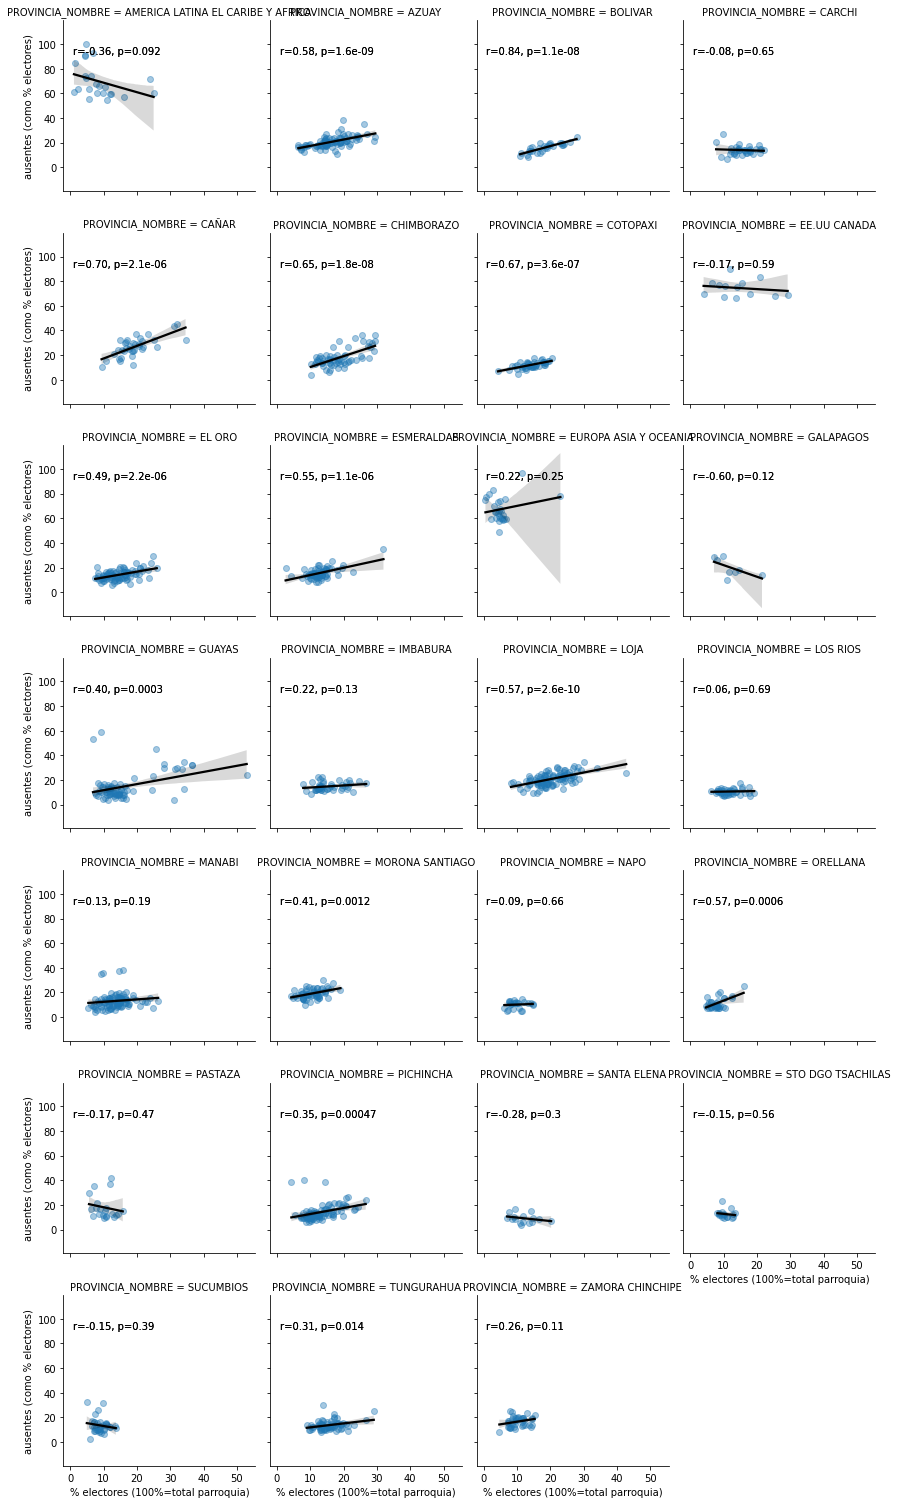

In [69]:
my = sns.lmplot(x='% electores (100%=total parroquia)', 
                y='ausentes (como % electores)',
                col='PROVINCIA_NOMBRE',
                col_wrap=4,
                data=tt,
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'black'}
               )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['% electores (100%=total parroquia)'], data['ausentes (como % electores)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

grid.map_dataframe(annotate)
grid.add_legend()

my.savefig('Graphs/M.png', dpi=300)

Otra opción para crear el gráfico es:

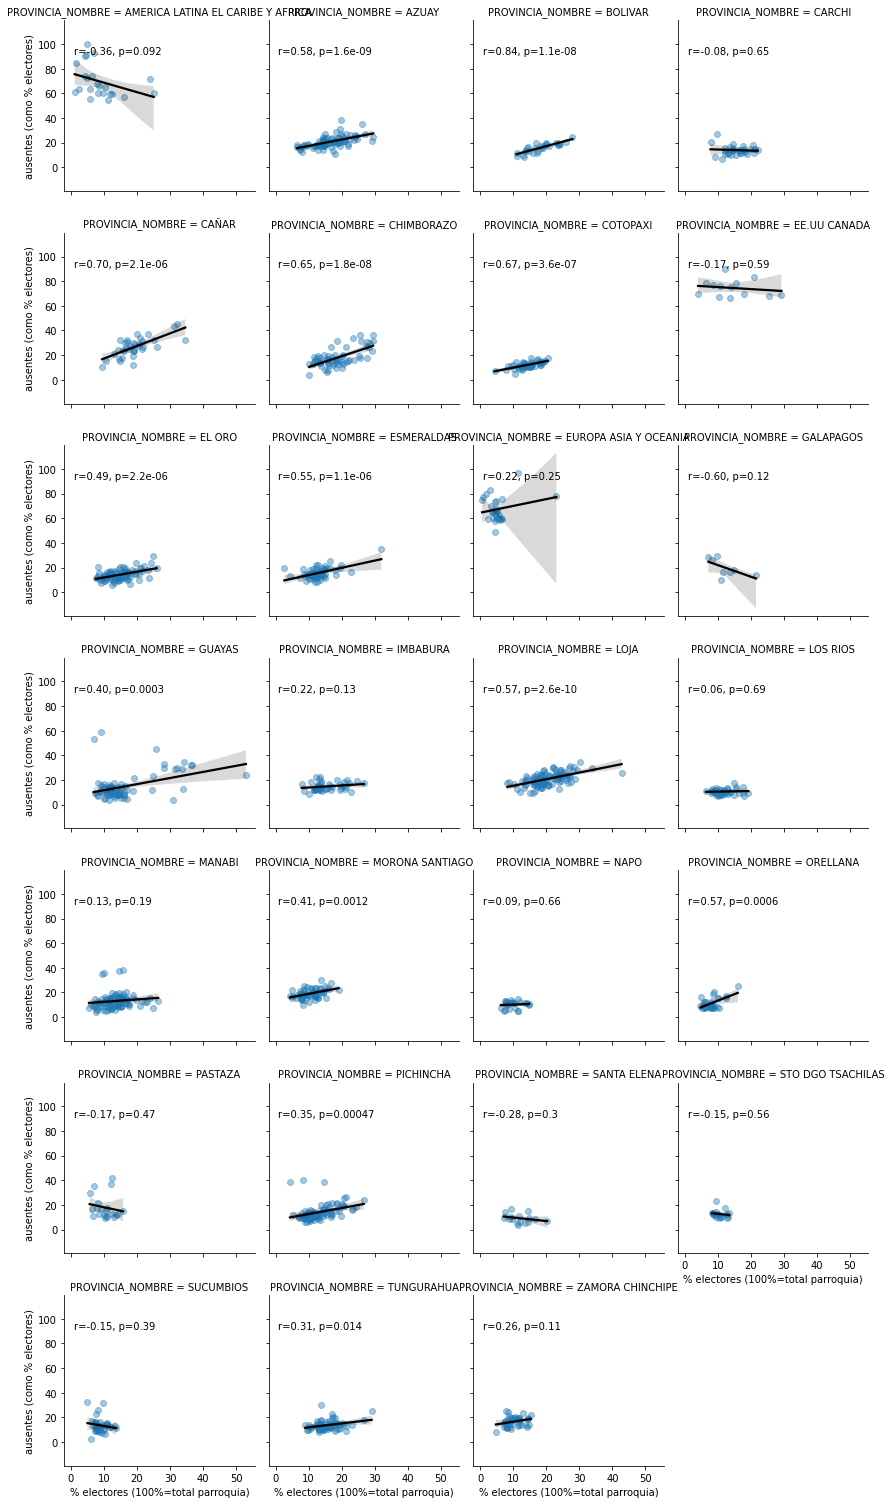

In [65]:
grid = sns.FacetGrid(data=tt, col='PROVINCIA_NOMBRE', col_wrap=4) 
grid.map(sns.regplot, '% electores (100%=total parroquia)', 
         'ausentes (como % electores)', 
         scatter_kws={'alpha': 0.4}, 
         line_kws={'color': 'black'}
        )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['% electores (100%=total parroquia)'], data['ausentes (como % electores)'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

grid.map_dataframe(annotate)
grid.add_legend()

plt.show()


Para más información de los gráficos revisar: 
https://stackoverflow.com/questions/25579227/seaborn-implot-with-equation-and-r2-text